# Cleaning Data using Pandas and NumPy #

The purpose of this project is to thoroughly clean a dataset using the pandas and NumPy libraries in python.

### Dataset Description ###

The data for this project has been scraped from the [Ebay Kelinanzeigen](https://en.wikipedia.org/wiki/Classified_advertising) website, a german site for car sales. The data is comprised of 50,000 data points with information regarding car sales from the Ebay site.

## Cleaning Preparation ##

To begin the cleaning process, I will import the pandas and NumPy libraries and read in the .csv data file.

In [2]:
import numpy as np
import pandas as pd

In [3]:
autos = pd.read_csv('autos.csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xdc in position 23: invalid continuation byte

According to this error message, the original data set is encoded in a codec other than the typical `utf-8`. I will also try the `Latin-1` codec to see if either works on this file.

In [4]:
autos = pd.read_csv('autos.csv', encoding='Latin-1')

It appears the original file has been read using a `Latin-1` encoding and is now ready for use.

### Exploring the Data ###

I will now explore the dataset to determine what problems might exist in the original file.

In [6]:
autos.info()
autos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
dateCrawled            50000 non-null object
name                   50000 non-null object
seller                 50000 non-null object
offerType              50000 non-null object
price                  50000 non-null object
abtest                 50000 non-null object
vehicleType            44905 non-null object
yearOfRegistration     50000 non-null int64
gearbox                47320 non-null object
powerPS                50000 non-null int64
model                  47242 non-null object
odometer               50000 non-null object
monthOfRegistration    50000 non-null int64
fuelType               45518 non-null object
brand                  50000 non-null object
notRepairedDamage      40171 non-null object
dateCreated            50000 non-null object
nrOfPictures           50000 non-null int64
postalCode             50000 non-null int64
lastSeen               50000 non-null obj

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


### Observations ###

A few key observations about the data in its current form:
* The rows are indexed by integer, there are no `str` headers to remove.
* Category titles are written in camelcase rather than the preferred snakecase, and some can be shortened easily.
* The `'dateCrawled`, `dateCreated`, and `lastSeen` categories contains date and time information, but are listed as `object` types rather than `datetime`.
* The `'name'` category does not have much standardization, including make, model and options listed in a long `str` format.
* The `'price'` category is listed as containing `object` data rather than `float` values which would be more useful.
* The `'odometer'` category needs to be stripped of the `'km'` characters and converted to an `'int` type.
* There are null values in the `vehicleType`, `gearbox`, `model`, `fuelType`, and `notRepairedDamage` categories.
* Null values do not make up more than ~20% of any particular category.

## Data Cleaning ##

### Step One: Formatting Columns ###

To begin, I will reformat the existing column headers to make for easier analysis.

In [250]:
autos.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [12]:
# Cleaninglean column headers
column_dict = {'dateCrawled': 'date_crawled','offerType':'offer_type',
               'vehicleType':'vehicle_type', 'yearOfRegistration': 'registration_year',
               'powerPS': 'power_ps', 'monthOfRegistration':'registration_month',
               'fuelType':'fuel_type', 'notRepairedDamage': 'unrepaired_damage',
               'dateCreated':'ad_created', 'nrOfPictures':'nr_of_pictures', 
               'postalCode':'postal_code', 'lastSeen':'last_seen'}

autos = autos.rename(columns=column_dict)
autos.head()

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


The column names have now been replaced to allow for a more uniform and concise pattern, and reformatted to snakecase which will make later analysis much simpler.

### Step Two: Exploring Column Data ###

Now I will take a closer look at the data in each column to determine any categories which should be eliminated, and any data which needs to be cleaned.

In [13]:
autos.describe(include='all')

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-19 17:36:18,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


#### Findings ###
* The `'price'` category is listed as containing `object` data rather than `float` values which would be more useful.
* The `'odometer'` category needs to be stripped of the `'km'` characters and converted to an `'int` type.
* The `'seller'` and `'offer_type'` categories contain 49,999 of the same value. These categories will likely not be useful for any analysis, and should be eliminated.
* The `'seller'`, `'fuel_type'`, `'unrepaired_damage'`, and `'gearbox'` includes several `str` items written in German, which we might want to translate to English for easier analysis.
* The `'date_crawled`, `date_created`, and `last_seen` categories contains date and time information, but are listed as `object` types rather than `datetime`.
* The `'name'` category does not have much standardization, including make, model and options listed in a long `str` format.

I will work through these tasks one at a time.

### Step Three: Price and Odometer Data ###

There are two categories of data which are currently stored as `str` and need to be converted to `float`.

First, the `'price'` category needs to be explored.

In [20]:
print(autos['price'].value_counts())

$0             1421
$500            781
$1,500          734
$2,500          643
$1,200          639
$1,000          639
$600            531
$3,500          498
$800            498
$2,000          460
$999            434
$750            433
$900            420
$650            419
$850            410
$700            395
$4,500          394
$300            384
$2,200          382
$950            379
$1,100          376
$1,300          371
$3,000          365
$550            356
$1,800          355
$5,500          340
$1,250          335
$350            335
$1,600          327
$1,999          322
               ... 
$3,620            1
$7,470            1
$2,180            1
$285              1
$15,249           1
$6,479            1
$5,198            1
$26,725           1
$99,999,999       1
$12,390           1
$5,749            1
$5,475            1
$36,800           1
$109,999          1
$7,795            1
$16,995           1
$8,944            1
$11,360           1
$960              1


It looks as though all of the values in this category are stored with a `'$'` character, and a `","` separator, both of which need to be stripped so the values can be converted to a float type.

In [21]:
autos['price'] = autos['price'].str.replace('$','')
autos['price'] = autos['price'].str.replace(',','')

In [22]:
autos['price'] = autos['price'].astype(float)
print(autos['price'].head())

0    5000.0
1    8500.0
2    8990.0
3    4350.0
4    1350.0
Name: price, dtype: float64


The unnecessary characters have been removed, and the type has been changed to a float variable.

Next, a similar process is necessary for the `'odometer'` category.

In [23]:
print(autos['odometer'].value_counts())

150,000km    32424
125,000km     5170
100,000km     2169
90,000km      1757
80,000km      1436
70,000km      1230
60,000km      1164
50,000km      1027
5,000km        967
40,000km       819
30,000km       789
20,000km       784
10,000km       264
Name: odometer, dtype: int64


Again, this series contains the `'km'` string and a `','` separator which need to be removed in order to be converted properly.

In [24]:
autos['odometer'] = autos['odometer'].str.replace('km','')
autos['odometer'] = autos['odometer'].str.replace(',','')

In [25]:
autos['odometer'] = autos['odometer'].astype(float)
print(autos['odometer'].head())

0    150000.0
1    150000.0
2     70000.0
3     70000.0
4    150000.0
Name: odometer, dtype: float64


This category has been converted. Now, the category name needs to be appended so we remember these figures are in kilometers.

In [26]:
autos.rename(columns={'odometer':'odometer_km'}, inplace=True)

In [27]:
print(autos.columns)

Index(['date_crawled', 'name', 'seller', 'offer_type', 'price', 'abtest',
       'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model',
       'odometer_km', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'nr_of_pictures', 'postal_code',
       'last_seen'],
      dtype='object')


The category name has been appended with the "km" distinction for future reference.

Next, I will explore the `'price'` category to see if there is any data which needs to be removed or replaced.

In [28]:
autos['price'].unique().shape

(2357,)

In [29]:
autos['price'].describe()

count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64

Evidently there are some outliers in this category which need to be removed, with a range from 0-100,000,000 euros.

In [30]:
price_count = autos['price'].value_counts()
price_count.sort_index().head(5)

0.0    1421
1.0     156
2.0       3
3.0       1
5.0       2
Name: price, dtype: int64

In [31]:
price_count.sort_index(ascending=False).head(5)

99999999.0    1
27322222.0    1
12345678.0    3
11111111.0    2
10000000.0    1
Name: price, dtype: int64

Evidently, there are values in this category with an abnormally low amount (including 1,421 values of 0), and values with an abnormally high amount. The mean price is approximately 9,840 euros. It is fair to assume for our purposes that prices of under 500 or above 100,000 euros will not be helpful for this analysis. Thus, we need to remove all values that fall outside of these parameters.

**NOTE:** I am simply replacing the value in the `price` column with a `np.nan` null value. I will repeat this for each cleaning method and remove all null value rows at the end of the cleaning process.

#### Removing Price Outliers ####

In [32]:
autos.loc[autos['price'] <= 300, 'price'] = np.nan
price_count = autos['price'].value_counts()
price_count.sort_index().head(5)

310.0     1
320.0    12
325.0     5
329.0     2
330.0     8
Name: price, dtype: int64

In [33]:
autos.loc[autos['price'] >= 100000, 'price'] = np.nan
price_count = autos['price'].value_counts()
price_count.sort_index(ascending=False).head(5)

99900.0    2
99000.0    2
98500.0    1
94999.0    1
93911.0    1
Name: price, dtype: int64

Now the extremely high and low prices have been removed, so they will no longer interfere with any average price calculations.

### Exploring the Odometer Column ###

Next, I will explore the `odometer_km` column to see if any outliers need to be removed from the data.

In [34]:
autos['odometer_km'].unique().shape

(13,)

In [35]:
autos['odometer_km'].describe()

count     50000.000000
mean     125732.700000
std       40042.211706
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: float64

These values do not seem to include any outliers which need to be removed.

### Step Four: Cleaning and Exploring Dates and Times ###

5 different columns in the dataset represent dates values. Two of these columns (`registration_month` and `registration_year`) are already in numerical form and can be analyzed accordingly. The remaining three categories need to be converted to a numerical format for analysis.

#### Formatting Dates ####

I will begin by changing the `date_crawled` category into a numerical form.

In [36]:
date_c_num = autos['date_crawled'].str[:10]
# Utilizing the first 10 characters of the string, which contains the date in a useable format.
print(date_c_num.head())

0    2016-03-26
1    2016-04-04
2    2016-03-26
3    2016-03-12
4    2016-04-01
Name: date_crawled, dtype: object


In [37]:
# Installing this new column of cleaned data back into the original dataset
autos['date_crawled'] = date_c_num
print(autos['date_crawled'].head())

0    2016-03-26
1    2016-04-04
2    2016-03-26
3    2016-03-12
4    2016-04-01
Name: date_crawled, dtype: object


I will repeat the same process for the `'last_seen'`, and `'ad_created'` columns.

In [38]:
seen_c_num = autos['last_seen'].str[:10]
# Utilizing the first 10 characters of the string, which contains the date in a useable format.
print(seen_c_num.head())

0    2016-04-06
1    2016-04-06
2    2016-04-06
3    2016-03-15
4    2016-04-01
Name: last_seen, dtype: object


In [39]:
# Installing this new column of cleaned data back into the original dataset
autos['last_seen'] = seen_c_num
print(autos['last_seen'].head())

0    2016-04-06
1    2016-04-06
2    2016-04-06
3    2016-03-15
4    2016-04-01
Name: last_seen, dtype: object


In [40]:
ad_c_num = autos['ad_created'].str[:10]
# Utilizing the first 10 characters of the string, which contains the date in a useable format.
print(ad_c_num.head())

0    2016-03-26
1    2016-04-04
2    2016-03-26
3    2016-03-12
4    2016-04-01
Name: ad_created, dtype: object


In [41]:
# Installing this new column of cleaned data back into the original dataset
autos['ad_created'] = ad_c_num
print(autos['ad_created'].head())

0    2016-03-26
1    2016-04-04
2    2016-03-26
3    2016-03-12
4    2016-04-01
Name: ad_created, dtype: object


All date values are in a numerical format for analysis.

#### Examining Distribution ####

Next, I will examine the distribution of each of these three date value categories.

In [43]:
# 'date_crawled' distribution
date_crawled_dist = autos['date_crawled'].value_counts(normalize=True, dropna=False).sort_index()
print(date_crawled_dist)

2016-03-05    0.02538
2016-03-06    0.01394
2016-03-07    0.03596
2016-03-08    0.03330
2016-03-09    0.03322
2016-03-10    0.03212
2016-03-11    0.03248
2016-03-12    0.03678
2016-03-13    0.01556
2016-03-14    0.03662
2016-03-15    0.03398
2016-03-16    0.02950
2016-03-17    0.03152
2016-03-18    0.01306
2016-03-19    0.03490
2016-03-20    0.03782
2016-03-21    0.03752
2016-03-22    0.03294
2016-03-23    0.03238
2016-03-24    0.02910
2016-03-25    0.03174
2016-03-26    0.03248
2016-03-27    0.03104
2016-03-28    0.03484
2016-03-29    0.03418
2016-03-30    0.03362
2016-03-31    0.03192
2016-04-01    0.03380
2016-04-02    0.03540
2016-04-03    0.03868
2016-04-04    0.03652
2016-04-05    0.01310
2016-04-06    0.00318
2016-04-07    0.00142
Name: date_crawled, dtype: float64


From this percentage distribution, it looks as if the data was collected over the course of 32 days, from March 5, 2016 to April 7, 2016. The percentages are distributed fairly evenly.

In [44]:
# 'last_seen' distribution
last_seen_dist = autos['last_seen'].value_counts(normalize=True, dropna=False).sort_index()
print(last_seen_dist)

2016-03-05    0.00108
2016-03-06    0.00442
2016-03-07    0.00536
2016-03-08    0.00760
2016-03-09    0.00986
2016-03-10    0.01076
2016-03-11    0.01252
2016-03-12    0.02382
2016-03-13    0.00898
2016-03-14    0.01280
2016-03-15    0.01588
2016-03-16    0.01644
2016-03-17    0.02792
2016-03-18    0.00742
2016-03-19    0.01574
2016-03-20    0.02070
2016-03-21    0.02074
2016-03-22    0.02158
2016-03-23    0.01858
2016-03-24    0.01956
2016-03-25    0.01920
2016-03-26    0.01696
2016-03-27    0.01602
2016-03-28    0.02086
2016-03-29    0.02234
2016-03-30    0.02484
2016-03-31    0.02384
2016-04-01    0.02310
2016-04-02    0.02490
2016-04-03    0.02536
2016-04-04    0.02462
2016-04-05    0.12428
2016-04-06    0.22100
2016-04-07    0.13092
Name: last_seen, dtype: float64


These values are from the same date range, and seem to increase slightly in percentage across the range.

In [45]:
# 'ad_created' distribution
ad_created_dist = autos['ad_created'].value_counts(normalize=True, dropna=False).sort_index()
print(ad_created_dist)

2015-06-11    0.00002
2015-08-10    0.00002
2015-09-09    0.00002
2015-11-10    0.00002
2015-12-05    0.00002
2015-12-30    0.00002
2016-01-03    0.00002
2016-01-07    0.00002
2016-01-10    0.00004
2016-01-13    0.00002
2016-01-14    0.00002
2016-01-16    0.00002
2016-01-22    0.00002
2016-01-27    0.00006
2016-01-29    0.00002
2016-02-01    0.00002
2016-02-02    0.00004
2016-02-05    0.00004
2016-02-07    0.00002
2016-02-08    0.00002
2016-02-09    0.00004
2016-02-11    0.00002
2016-02-12    0.00006
2016-02-14    0.00004
2016-02-16    0.00002
2016-02-17    0.00002
2016-02-18    0.00004
2016-02-19    0.00006
2016-02-20    0.00004
2016-02-21    0.00006
               ...   
2016-03-09    0.03324
2016-03-10    0.03186
2016-03-11    0.03278
2016-03-12    0.03662
2016-03-13    0.01692
2016-03-14    0.03522
2016-03-15    0.03374
2016-03-16    0.03000
2016-03-17    0.03120
2016-03-18    0.01372
2016-03-19    0.03384
2016-03-20    0.03786
2016-03-21    0.03772
2016-03-22    0.03280
2016-03-23

This data covers a much broader date range, from June, 2015 to April, 2016, which is to be expected given that this value represents the time each item was posted for sale.

#### Analyzing Registration Year ####

Next, I will explore the `'registration_year'` column.

In [48]:
autos['registration_year'].describe()

count    50000.000000
mean      2005.073280
std        105.712813
min       1000.000000
25%       1999.000000
50%       2003.000000
75%       2008.000000
max       9999.000000
Name: registration_year, dtype: float64

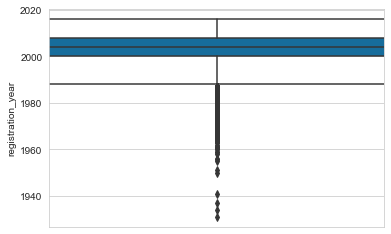

In [97]:
import seaborn as sns
sns.set_style("whitegrid") 
sns_plot = sns.boxplot(y = 'registration_year', data=autos, palette='colorblind', width=1000)
fig = sns_plot.get_figure()
fig.savefig("regboxplot.png")

This data seems to contain some significant problems. Cars cannot be registerd for a date following the sale of the car, so any value later than the year 2016 is an error. The max value of this column is 9999 which seems like a data input error. In addition, the minimum value of this column is 1000, which is also impossible.

To clean this data, we will need to select a reasonable range for registration years, outside of which all values are removed. For the purpose of this analysis, a car listed as registered prior to the year 1900 seems reasonably likely to be an error. So our range of acceptable dates will be from 1900-2016.

#### Removing Registration Outliers ####

In [65]:
autos.loc[autos['registration_year'] < 1900, 'registration_year'] = np.nan
autos.loc[autos['registration_year'] > 2016, 'registration_year'] = np.nan
reg_count = autos['registration_year'].value_counts()
reg_count.sort_index().head(5)

1910.0    9
1927.0    1
1929.0    1
1931.0    1
1934.0    2
Name: registration_year, dtype: int64

With those outlier values removed, we can further explore this column with a value count distribution.

In [67]:
reg_created_dist = autos['registration_year'].value_counts(normalize=True, dropna=False).sort_index()
print(reg_created_dist)

1910.0    0.00018
1927.0    0.00002
1929.0    0.00002
1931.0    0.00002
1934.0    0.00004
1937.0    0.00008
1938.0    0.00002
1939.0    0.00002
1941.0    0.00004
1943.0    0.00002
1948.0    0.00002
1950.0    0.00006
1951.0    0.00004
1952.0    0.00002
1953.0    0.00002
1954.0    0.00004
1955.0    0.00004
1956.0    0.00010
1957.0    0.00004
1958.0    0.00008
1959.0    0.00014
1960.0    0.00068
1961.0    0.00012
1962.0    0.00008
1963.0    0.00018
1964.0    0.00024
1965.0    0.00034
1966.0    0.00044
1967.0    0.00054
1968.0    0.00052
           ...   
1988.0    0.00284
1989.0    0.00362
1990.0    0.00790
1991.0    0.00712
1992.0    0.00782
1993.0    0.00890
1994.0    0.01320
1995.0    0.02626
1996.0    0.02888
1997.0    0.04056
1998.0    0.04906
1999.0    0.06000
2000.0    0.06708
2001.0    0.05406
2002.0    0.05066
2003.0    0.05454
2004.0    0.05474
2005.0    0.06030
2006.0    0.05416
2007.0    0.04608
2008.0    0.04462
2009.0    0.04196
2010.0    0.03194
2011.0    0.03268
2012.0    

As expected, these values increase according to the year, so more currently registered cars are more popular on this site. However, there are several cars with registrations listed in the early 1900s, which is surprising. Also, there are several null values which will be removed in our final cleaning step.

### Step Five: Removing Null Values ###

Finally, to clean the data appropriately, we will remove all rows containing null values. This way, any analysis function we wish to use on the data will be able to run smoothly.

In [68]:
autos = autos.dropna(axis=0)
autos.info()
autos.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33840 entries, 0 to 49999
Data columns (total 20 columns):
date_crawled          33840 non-null object
name                  33840 non-null object
seller                33840 non-null object
offer_type            33840 non-null object
price                 33840 non-null float64
abtest                33840 non-null object
vehicle_type          33840 non-null object
registration_year     33840 non-null float64
gearbox               33840 non-null object
power_ps              33840 non-null int64
model                 33840 non-null object
odometer_km           33840 non-null float64
registration_month    33840 non-null int64
fuel_type             33840 non-null object
brand                 33840 non-null object
unrepaired_damage     33840 non-null object
ad_created            33840 non-null object
nr_of_pictures        33840 non-null int64
postal_code           33840 non-null int64
last_seen             33840 non-null object
dtypes: floa

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
0,2016-03-26,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,5000.0,control,bus,2004.0,manuell,158,andere,150000.0,3,lpg,peugeot,nein,2016-03-26,0,79588,2016-04-06
1,2016-04-04,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,8500.0,control,limousine,1997.0,automatik,286,7er,150000.0,6,benzin,bmw,nein,2016-04-04,0,71034,2016-04-06
2,2016-03-26,Volkswagen_Golf_1.6_United,privat,Angebot,8990.0,test,limousine,2009.0,manuell,102,golf,70000.0,7,benzin,volkswagen,nein,2016-03-26,0,35394,2016-04-06
3,2016-03-12,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,4350.0,control,kleinwagen,2007.0,automatik,71,fortwo,70000.0,6,benzin,smart,nein,2016-03-12,0,33729,2016-03-15
4,2016-04-01,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,1350.0,test,kombi,2003.0,manuell,0,focus,150000.0,7,benzin,ford,nein,2016-04-01,0,39218,2016-04-01


At the end of this cleaning process, the data set contains 33,840 properly-formatted entries.

## Further Exploration ##

Before completing this project, I would like to make a preliminary exploration of some of the interesting pieces of information in the data set.

I will begin by creating an index of brands to see the sales distribution. To begin, I need to determine which `brand` values to use in the index.

In [73]:
brands = autos['brand'].value_counts(normalize=True, dropna=False).sort_values(ascending=False)
print(brands[:10])

volkswagen       0.206619
bmw              0.118499
mercedes_benz    0.104669
opel             0.100148
audi             0.093056
ford             0.065514
renault          0.043765
peugeot          0.029492
fiat             0.022843
seat             0.018794
Name: brand, dtype: float64


Based on this distribution, there are six brands that represent at least 5% of the values in the dataset:

* volkswagen (20.6%)
* bmw (11.8%)
* mercedes_benz (10.4%)
* opel (10.0%)
* audi (9.3%)
* ford (6.5%)

Rather than aggregating based on every brand name, I will examine only the cars sold from these six brands. This will make for a simpler and more meaningful analysis.

{'volkswagen': 6417.993278032037, 'bmw': 9161.355610972569, 'mercedes_benz': 9439.892715979673, 'opel': 3576.340808498082, 'audi': 10582.129882502382, 'ford': 4556.487595850248}


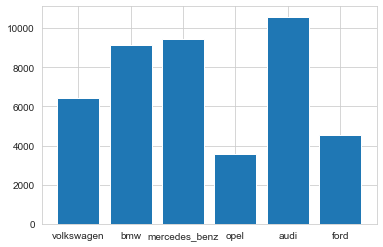

In [98]:
import matplotlib.pyplot as plt
top_brands = {}

brands = ['volkswagen', 'bmw', 'mercedes_benz', 'opel', 'audi', 'ford']

for b in brands:
    selected_rows = autos[autos['brand'] == b]
    bmean = selected_rows['price'].mean()
    top_brands[b] = bmean

print(top_brands)
plt.bar(*zip(*top_brands.items()))
plt.savefig('model_dist.png', dpi=300, bbox_inches='tight')
plt.show()

According to this distribution table, it looks as though the most popular selling cars on this eBay site are in two pricing tiers:
* High-price tier (Audi, Mercedes-Benz, BMW)
* Mid-price tier (Volkswagen, Fored, Opel)

Finally, I will do the same distribution table using these six brands for the average mileage, eventually comparing these two averages in a single dataframe.

{'audi': 126308.35185773262, 'bmw': 131526.18453865335, 'ford': 122417.68155164637, 'mercedes_benz': 129841.89723320158, 'opel': 127000.59014458543, 'volkswagen': 126015.44622425629}


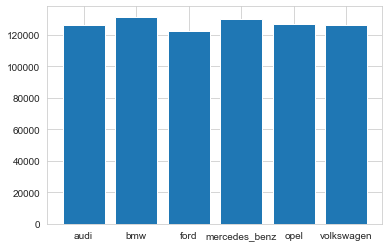

In [103]:
top_brands_km = {}

brands = ['audi', 'bmw', 'ford', 'mercedes_benz', 'opel', 'volkswagen']

for b in brands:
    selected_rows = autos[autos['brand'] == b]
    bmeankm = selected_rows['odometer_km'].mean()
    top_brands_km[b] = bmeankm

print(top_brands_km)
plt.bar(*zip(*top_brands_km.items()))
plt.savefig('km_dist2.png', dpi=300, bbox_inches='tight')

In [90]:
# Converting both dictionaries to series

top_brands = pd.Series(top_brands)
top_brands_km = pd.Series(top_brands_km)

# Converting first series to DataFrame
top_brands_df = pd.DataFrame(top_brands, columns=['mean_price'])
top_brands_df

,mean_price
volkswagen,6417.993278
bmw,9161.355611
mercedes_benz,9439.892716
opel,3576.340808
audi,10582.129883
ford,4556.487596


In [91]:
# Assinging other series as new column in the `top_brands_df` dataframe

top_brands_df['mean_km'] = 0
top_brands_df.loc[:,'mean_km'] = top_brands_km

In [94]:
top_brands_df

,mean_price,mean_km
volkswagen,6417.993278,126015.446224
bmw,9161.355611,131526.184539
mercedes_benz,9439.892716,129841.897233
opel,3576.340808,127000.590145
audi,10582.129883,126308.351858
ford,4556.487596,122417.681552


This shows us that although the mean mileage for each brand is roughly the same (from 126,000-131,000km), the average price for the brands varies greatly. Thus, we can show that the top-tier brands sell for more money than others, controlling for mileage.